# Assignment 1 - EDA of Haberman's Survival Dataset
This is the first assignment on data visualization.

1. The data and reference notebook is attached here, try to document every plot and analysis that you do.
2. Experiment with different functionalities of jupyter notebook and get habituated with its features.
3. Try out as many plotting techniques as you can, but write down your observations for each of them.
4. Please be sure to have proper axes names, title and legend to all the charts that you plot.
5. Have a proper conclusions section where in you summarise your overall observation.
6. If you want to explore more about Haberman's Survival Data Set, you can try out this link https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

Note-1: Check this to see how to submit an assignment https://www.youtube.com/watch?v=PdDJSWQAM8A
Note-2: If you have used code from somewhere, provide those references or citations. Else it will be considered as plagiarism.
Note-3: Upload both python notebook and pdf version of that notebook
Note-4: For converting Jupyter notebook to PDF please have a look at this link: https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html
(or) you can download the notebook as HTML file and then convert the HTML file to pdf, you can find many online tools for this conversion. But you can give this website a try https://pdfcrowd.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Domain Knowledge: Description of data set features
The data-set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

* **Age of patient** at the time of operation (independent variable)
* **Patient’s year of operation** (independent variable)
* **Number of positive axillary nodes (Lymph Nodes)** detected (independent variable)
* **Survival status** (dependent variable/class feature)

**Lymph nodes** are small structures located all over the body around blood vessels that act as filters and can accumulate germs or cancer cells. They are a part of the lymph system of the body. Also known as armpit nodes, the medical term for armpits is **axilla**. Normally, you probably don't even know you have lymph nodes. But they can become swollen, growing to the size of a pea or bean and become tender or painful. Causes of swollen lymph nodes in the armpit include - Cancers, including lymphomas, leukemias, and breast cancer. **In our data it is axillary nodes detected(0–52)**

**Survival Status:** It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.


In [2]:
#Haberman data set does not contain any column name, therefore adding them manually.
haberman = pd.read_csv("haberman.csv",header=None, names=["age","year_of_operation","axillary_nodes","survival_status"])
#print the first 5 rows of the dataset
haberman.head() 
#haberman['axillary_nodes'].unique()

,age,year_of_operation,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### High level statistics of the dataset: 

##### Number of points, numer of features, number of classes, data-points per class.

In [3]:
# 1. Number of points, numer of feature.
haberman.shape

(306, 4)

In [4]:
# Columns in our dataset
haberman.columns

Index(['age', 'year_of_operation', 'axillary_nodes', 'survival_status'], dtype='object')

In [5]:
# Number of classes in our dataset, data-points per class.
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                  306 non-null int64
year_of_operation    306 non-null int64
axillary_nodes       306 non-null int64
survival_status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
haberman.describe()

,age,year_of_operation,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


##### Observations

* There are 4 feature in the data set including the class label. The features 'age', 'year_of_operation', 'axillary_nodes' are independent. "Survival Status" is the dependent variable and also the class label.


* There are 306 rows and 4 columns in the dataset. 


* There are 2 classes in the data set, viz., survival_staus =1 (survived more than 5 years) survival_status=2 (did not survive more than 5 years).


* The given data set is not balanced as the values of class 1 are 225 and values in class 2 are just 81. Thus, class 1 dominates the data set as it is more than double of class 2.


* All the data in the dataset is numerical. There are no categorical attributes.


* There are no missing values in our data set as seen below. Therefore, there is no need for data imputation.


* We observe that the surival_status column provides information about whether the patient surivived after 5 years of not. We can thus convert this column to have two categorical values: 1 = 'yes' (survived after 5 years) and 2 = 'no' (did not survive 5 years).

In [8]:
# Map 1 to alive and 2 to dead, in the data set
haberman["survival_status"] = haberman["survival_status"].map({1:"yes",2:"no"})

In [9]:
haberman.head() # the new data set looks like this

,age,year_of_operation,axillary_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [10]:
survived = haberman.loc[haberman['survival_status']=='yes']
died = haberman.loc[haberman['survival_status']=='no']

# Objective : What are we trying to achieve?

Based on the given data-set and without any formal modeling, classify a new observation into class 1/ survival_status = "yes" (will survive more than 5 years) or class 2/ survival_status = "no" (will not survive more than 5 years) . i.e given new data with age, year of operation and number of axiliary positive nodes, predict whether the patient will survive for more than 5 years or not.

# 2-D Scatter Plot

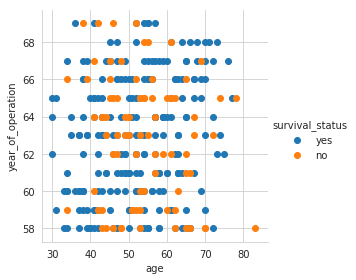

In [11]:
sns.set_style("whitegrid");
g = sns.FacetGrid(haberman, hue="survival_status", height=4)
g.map(plt.scatter, "age", "year_of_operation")
g.add_legend();
plt.show();

#### Conclusions :

* Nothing concrete can be derived from the above scatter plot as values data seems to be highly mixed up.


* However, it can be seen that most of the operations were performed on people between age 40 to 65.

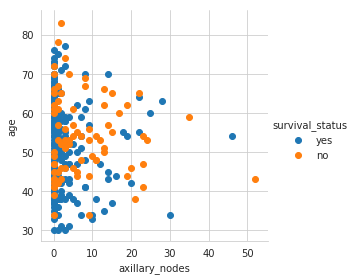

In [42]:
sns.set_style("whitegrid");
g = sns.FacetGrid(haberman, hue="survival_status", height=4)
g.map(plt.scatter, "axillary_nodes", "age")
g.add_legend();
plt.show();

#### Conclusions :

* Nothing concrete can be derived from the above scatter plot as values data seems to be highly mixed up.


* However, it can be seen that most of the patients who survived had only 0-3 axillary nodes. Less axillary nodes increase chance of survival

# Multivariate Analysis : Pair Plots

In our dataset, we have more than 2 features, in order to see the relationship between multiple features and their effect on the classes, we perform multivariate analysis. **Pair plots** are a common way to visualize relationship between attributes and their effect on the class labels.

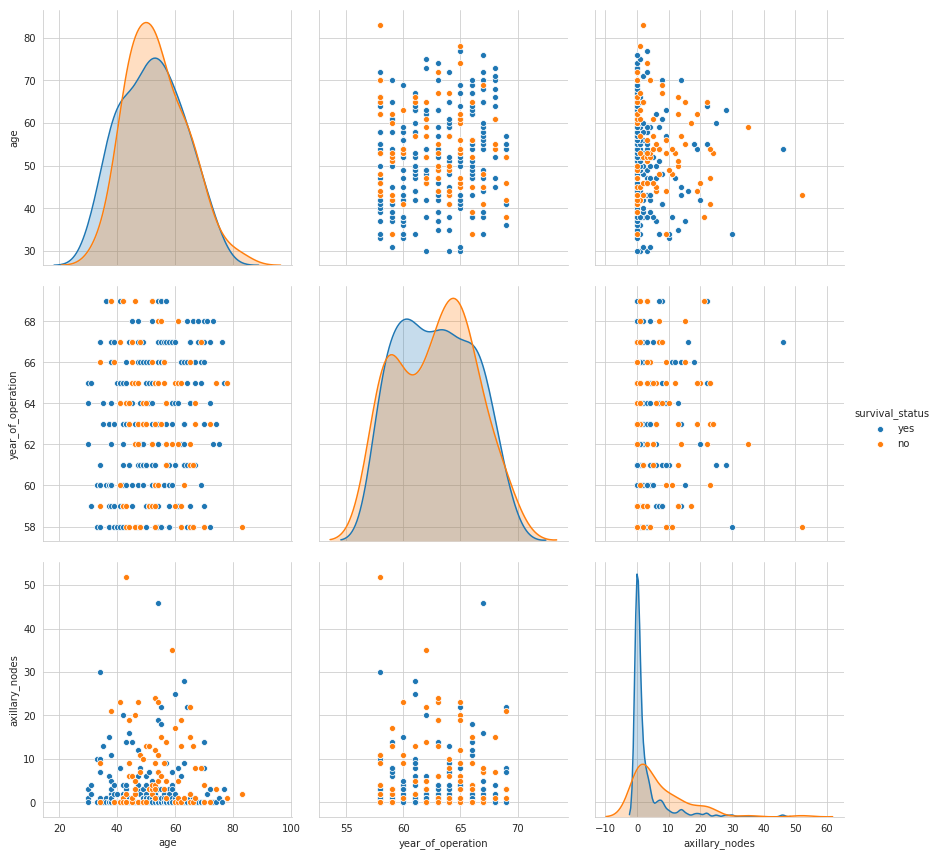

In [12]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height=4);
plt.show()

#### Observations:

* From the above pair plots, there is no correlation that can be drawn between the attributes, since, in all the  pair plots the data points overlap. 


* There is no correlation between the age and year of operation or age and number of axillary nodes.


* There is not sufficient evidence to decide upon features that provide a clear line of demarcation.


* As stated earlier, this dataset is not balanced and is inclined more towards the survived class (i.e. class =1)

# Univariate Analysis

In univariate analysis we consider a single feature and analyze them separately to draw useful patterns and conclusions.

### 1D Scatter Plot

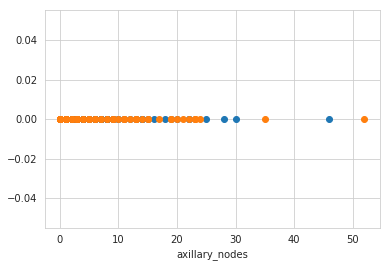

In [13]:
survived = haberman.loc[haberman["survival_status"] == "yes"];
not_survived = haberman.loc[haberman["survival_status"] == "no"];

plt.xlabel("axillary_nodes")
a, = plt.plot(survived["axillary_nodes"], np.zeros_like(survived['axillary_nodes']), 'o')
b, = plt.plot(not_survived["axillary_nodes"], np.zeros_like(not_survived['axillary_nodes']), 'o')


#### Conclusion

* Most of the class data  overlaps and so there is nothing that can be concluded from this plot. To do a better analysis, let us switch to histograms, pdf and cdf.

### Histogram

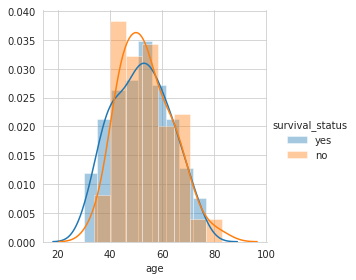

In [14]:
g = sns.FacetGrid(haberman, hue="survival_status", height=4)
g.map(sns.distplot, "age")
g.add_legend();
plt.show();

**Conclusion:** PDF of both the classes overlap. This distribution is inconclusive. There are no clean decision boundaries that can be inferred from this plot.

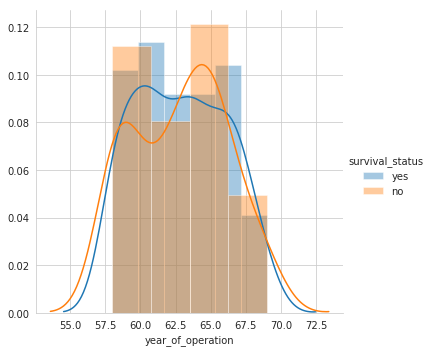

In [15]:
# year_of_operation	axillary_nodes
g = sns.FacetGrid(haberman, hue="survival_status", height=5)
g.map(sns.distplot, "year_of_operation")
g.add_legend();
plt.show();

#### Conclusion:
PDFs of both classess overlap almost completely. No conclusion can be drawn.

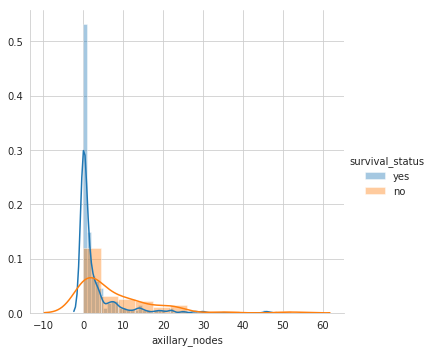

In [16]:
g = sns.FacetGrid(haberman, hue="survival_status", height=5)
g.map(sns.distplot, "axillary_nodes").add_legend();
plt.show();

**Conclusion:** The **PDF curve of survival peaks at axillary_nodes = 0**. This means that, the chances of survival are high if a patient does not have axillary nodes. Since, the pdf for survival class has a narrow spread, the above claim is true for most of the population in the survival class. Moreover, it can be further inferred that the chances of survival decrease as the lymph nodes increase. 

### PDF and CDF

#### 1. Age

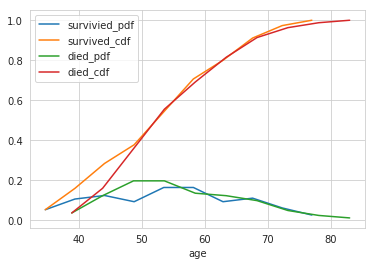

In [17]:
counts, bin_edges = np.histogram(survived['age'], bins=10, density=True)

#calculate PDF
pdf = counts/np.sum(counts)
#calculate CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(died['age'], bins=10, density=True)
pdf = counts/np.sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survivied_pdf','survived_cdf','died_pdf','died_cdf'])
plt.xlabel("age")
plt.show()

#### 2. Year of Operation

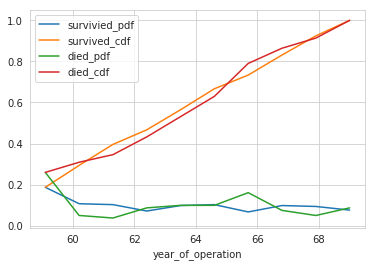

In [18]:
counts, bin_edges = np.histogram(survived['year_of_operation'], bins=10, density=True)

#calculate PDF
pdf = counts/np.sum(counts)
#calculate CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(died['year_of_operation'], bins=10, density=True)
pdf = counts/np.sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survivied_pdf','survived_cdf','died_pdf','died_cdf'])
plt.xlabel("year_of_operation")
plt.show()

#### 3. Axillary Nodes

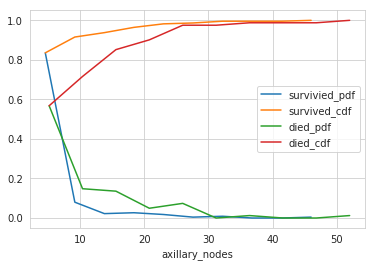

In [19]:
counts, bin_edges = np.histogram(survived['axillary_nodes'], bins=10, density=True)

#calculate PDF
pdf = counts/np.sum(counts)
#calculate CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(died['axillary_nodes'], bins=10, density=True)
pdf = counts/np.sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survivied_pdf','survived_cdf','died_pdf','died_cdf'])
plt.xlabel("axillary_nodes")
plt.show()

#### Conclusion:

* It can be seen that as the axillary nodes decrease the chances of survival also increase. This is why the pdf of survival steeply increases as the number of nodes become less than 10.

* The survival pdf steeply decreases as the number of axillary nodes decrease.

* Similarly, the pdf of people who died after 5 years increases as the number of nodes increase.

### Mean, Variance and Std-dev (for patients who survived more than 5 yrs)

In [20]:
print("Mean:")
print("Mean age- Survived", survived['age'].mean())
print("Mean age- Died", died['age'].mean())
print("Mean year of operation - Survived", survived['year_of_operation'].mean())
print("Mean year of operation - Died", died['year_of_operation'].mean())
print("Mean axillary nodes - Survived", survived['axillary_nodes'].mean())
print("Mean axillary nodes - Died", died['axillary_nodes'].mean())

print("\nStd Deviation: ")
print("Deviation in age-Survived", survived['age'].std())
print("Deviation in age-Died", died['age'].std())
print("Deviation in  year of operation - Survived", survived['year_of_operation'].std())
print("Deviation in  year of operation - Died", died['year_of_operation'].std())
print("Deviation in axillary nodes -Survived", survived['axillary_nodes'].std())
print("Deviation in axillary nodes - Died", died['axillary_nodes'].std())

Mean:
Mean age- Survived 52.01777777777778
Mean age- Died 53.67901234567901
Mean year of operation - Survived 62.86222222222222
Mean year of operation - Died 62.82716049382716
Mean axillary nodes - Survived 2.7911111111111113
Mean axillary nodes - Died 7.45679012345679

Std Deviation: 
Deviation in age-Survived 11.012154179929546
Deviation in age-Died 10.16713720829741
Deviation in  year of operation - Survived 3.222915223781498
Deviation in  year of operation - Died 3.34211805393223
Deviation in axillary nodes -Survived 5.870318127719728
Deviation in axillary nodes - Died 9.185653736555782


### Median, Percentile, Quantile, IQR, MAD

In [21]:
print("\nMedians:")
print("\nSurvived more than 5 years:")
print("age",np.median(survived["age"]))
print("year_of_operation",np.median(survived["year_of_operation"]))
print("axillary_nodes",np.median(survived["axillary_nodes"]))
print("\nDied in less than 5 years")
print("age", np.median(died["age"]))
print("year_of_operation",np.median(died["year_of_operation"]))
print("axillary_nodes",np.median(died["axillary_nodes"]))


print("\nQuantiles:")
print("\nSurvived more than 5 years:")
print("age",np.percentile(survived["age"],np.arange(0, 100, 25)))
print("year_of_operation",np.percentile(survived["year_of_operation"],np.arange(0, 100, 25)))
print("axillary_nodes",np.percentile(survived["axillary_nodes"], np.arange(0, 100, 25)))
print("\nDied in less than 5 years")
print("age",np.percentile(died["age"],np.arange(0, 100, 25)))
print("year_of_operation",np.percentile(died["year_of_operation"],np.arange(0, 100, 25)))
print("axillary_nodes",np.percentile(died["axillary_nodes"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("\nSurvived more than 5 years:")
print("age",np.percentile(survived["age"],90))
print("year_of_operation",np.percentile(survived["year_of_operation"],90))
print("axillary_nodes",np.percentile(survived["axillary_nodes"], 90))
print("\nDied in less than 5 years")
print("age",np.percentile(died["age"],90))
print("year_of_operation",np.percentile(died["year_of_operation"],90))
print("axillary_nodes",np.percentile(died["axillary_nodes"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("\nSurvived more than 5 years:")
print("age",robust.mad(survived["age"]))
print("year_of_operation",robust.mad(survived["year_of_operation"]))
print("axillary_nodes",robust.mad(survived["axillary_nodes"]))
print("\nDied in less than 5 years")
print("age",robust.mad(died["age"]))
print("year_of_operation",robust.mad(died["year_of_operation"]))
print("axillary_nodes",robust.mad(died["axillary_nodes"]))


Medians:

Survived more than 5 years:
age 52.0
year_of_operation 63.0
axillary_nodes 0.0

Died in less than 5 years
age 53.0
year_of_operation 63.0
axillary_nodes 4.0

Quantiles:

Survived more than 5 years:
age [30. 43. 52. 60.]
year_of_operation [58. 60. 63. 66.]
axillary_nodes [0. 0. 0. 3.]

Died in less than 5 years
age [34. 46. 53. 61.]
year_of_operation [58. 59. 63. 65.]
axillary_nodes [ 0.  1.  4. 11.]

90th Percentiles:

Survived more than 5 years:
age 67.0
year_of_operation 67.0
axillary_nodes 8.0

Died in less than 5 years
age 67.0
year_of_operation 67.0
axillary_nodes 20.0

Median Absolute Deviation

Survived more than 5 years:
age 13.343419966550417
year_of_operation 4.447806655516806
axillary_nodes 0.0

Died in less than 5 years
age 11.860817748044816
year_of_operation 4.447806655516806
axillary_nodes 5.930408874022408


### Conclusions:

* It can be concluded that 50% of the people who survived had zero axillary nodes.


* 75% of the patients who survived more than 5 years had less than or equal to three axillary nodes.


* 75% of the patients who surived more than 5 years were less than or equal to 60 years of age.


* 90% of the patients who survived more than 5 years had less than or equal to 8 axillary nodes and were less than 67 years of age.


* 90% of the patients who died had less than or equal to 20 axillary nodes.

### Box plot and Whiskers

#### 1. Age

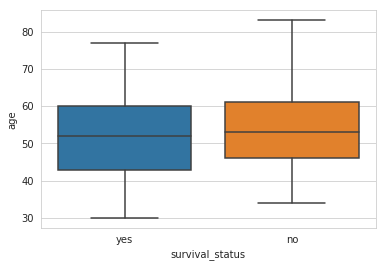

In [24]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='survival_status',y='age', data=haberman)
plt.show()

#### 2. Year of operation

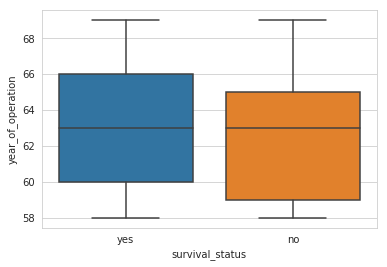

In [25]:
sns.boxplot(x='survival_status',y='year_of_operation', data=haberman)
plt.show()

#### 3. Axillary Nodes

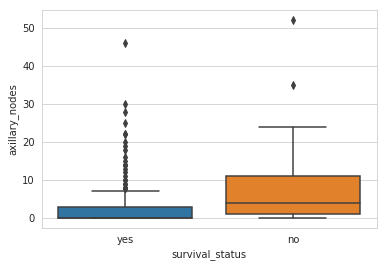

In [26]:
sns.boxplot(x='survival_status',y='axillary_nodes', data=haberman)
plt.show()

#### Conclusion:

* The box plots above show us the 25th, 50th and the 75th percentile values of each of the attribute in the data set correspoing to the set of patients who survived (survival_status = yes) more than 5 years and the patients who died (survival_status = no).



* From the box plot of axillary nodes we can see than 75th percentile value of the axillary nodes of patients who survived is around 3 nodes. This means that less number of axillary nodes means more chances of surival of the patients.



* However, if we just use axillary nodes as criteria for determining surival, and choose the 75th percentile value as a threshold, we will end up misclassifying more than 25% of the patients who did not survive.

### Violin Plots

#### 1. Age

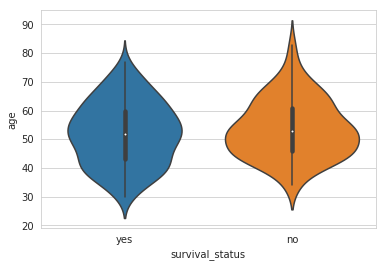

In [27]:
sns.violinplot(x='survival_status',y='age', data=haberman)
plt.show()

#### 2. Year of operation

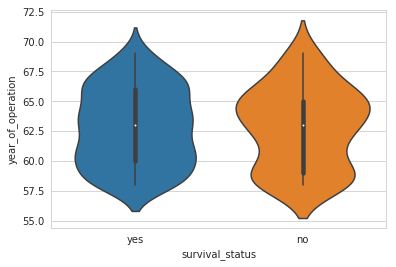

In [28]:
sns.violinplot(x='survival_status',y='year_of_operation', data=haberman)
plt.show()

#### 3. Axillary Nodes

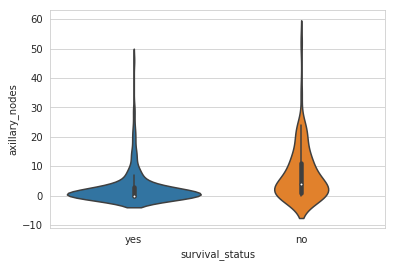

In [29]:
sns.violinplot(x='survival_status',y='axillary_nodes', data=haberman)
plt.show()

#### Conclusions:

* Violin Plots give us a combined view of the pdf and the box plots.


* The middle portion of the violin describe the box plots, where the bottom edge of the rectangle represents the 25th percentile value, the middle white dot represents the 50th percentile value and the upper egde of the rectangle represents the 75th percentile value.


* From the above violin plot is can be concluded that 50% the patients who survived more than 5 years had zero axillary nodes.


* As the number of positive axillary nodes increase the chances of survival decrease.


* However, it can also be concluded that number of positive axillary nodes in itself is not a suitable criteria for determining patient survival as there are patients who had zero positive axillary nodes but could not survive more than 5 years. This is evident from the violin plot of survival_status = no.

 
* Year of operation gives similar plots for both the classes and there is a lot of overlap between the data points so, year_of_operation is not an important attribute in determining the survival of patients.

## Multivariate Analysis

### Contour Plots: Patients who survived more than 5 years after operation

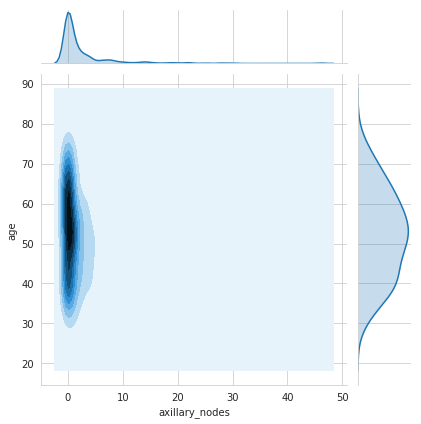

In [40]:
sns.jointplot(x="axillary_nodes", y="age", data =survived , kind="kde");
plt.show();

### Contour Plots: Patients who did not survive more than 5 years after operation

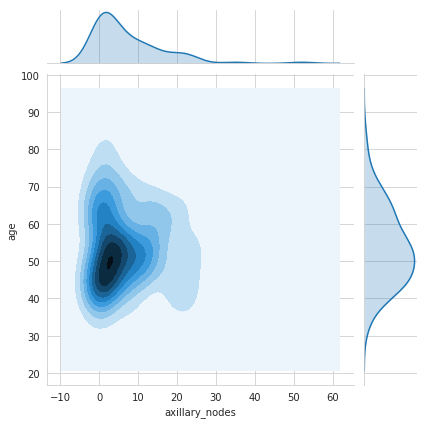

In [39]:
sns.jointplot(x="axillary_nodes", y="age", data =died , kind="kde");
plt.show();

#### Conclusions

 * Patients year of operation and age have no importance in determining the survival of the patients.
 
 
 * As has been concluded earlier, the patient's age and the number of axillary nodes have no coorelation.
 
 
 * As the number of axillary nodes decreases the chances of survival increase however, there are patients with zero axillary nodes who could not survive for 5 years after the operation.
 
 
 * There is a lot of overlap in the data points with the given set of attributes there is no single deciding attribute for classification.
 
 
 * Number of axillary nodes show a trend in the survival status, as they decrease the chances of surival increases. However, this trend is not uniform and there are patients with zero axillary nodes who died within 5 years.
 
 
 
 * A simple classifier build on this data set will have high misclassification rate as the data points overlap a lot with the given set of attributes. There seems to be no clear decision boundry.